## 네이버 영화 평점 기준 영화의 평점 변화 확인

In [1]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup # 파싱, 선택
from urllib.request import urlopen # html 파일 요청

In [2]:
url_base = 'http://movie.naver.com/'
url_sub = 'movie/sdb/rank/rmovie.nhn?sel=cur&date=20210301'

page = urlopen(url_base+url_sub)
page

In [3]:
# parsing
soup = BeautifulSoup(page, 'html.parser')
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20210301" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [4]:
soup.find_all('div', class_='tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=192613" title="디지몬 어드벤처 라스트 에볼루션 : 인연">디지몬 어드벤처 라스트 에볼루션 : 인연</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=151196" title="원더">원더</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=196843" title="극장판 바이올렛 에버가든">극장판 바이올렛 에버가든</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=202381" title="송가인 더 드라마">송가인 더 드라마</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=18543" title="서유기 2 - 선리기연">서유기 2 - 선리기연</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=194334" title="부활: 그 증거">부활: 그 증거</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=184517" title="소울">소울</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=31726" title="엽기적인 그녀">엽기적인 그녀</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=196051" title="극장판 귀멸의 칼날: 무한열차편">극장판 귀멸의 칼날: 무한열차편</a>
 </div>,
 <div class="tit5

In [5]:
type(soup.find_all('div', class_='tit5')[0])

bs4.element.Tag

In [6]:
# Tag라면 . 이 가능하여 .a로 a 태그도 불러올 수 있음

soup.find_all('div', class_='tit5')[0].a 

<a href="/movie/bi/mi/basic.nhn?code=192613" title="디지몬 어드벤처 라스트 에볼루션 : 인연">디지몬 어드벤처 라스트 에볼루션 : 인연</a>

In [7]:
# Tag라면 . 이 가능하여 .a로 a 태그도 불러올 수 있음
# 그 상태에서 string 만 불러오면 제목만 가져올 수 있음
soup.find_all('div', class_='tit5')[0].a.string

'디지몬 어드벤처 라스트 에볼루션 : 인연'

In [8]:
# point
soup.find_all('td', class_='point')

[<td class="point">9.56</td>,
 <td class="point">9.51</td>,
 <td class="point">9.50</td>,
 <td class="point">9.43</td>,
 <td class="point">9.36</td>,
 <td class="point">9.34</td>,
 <td class="point">9.31</td>,
 <td class="point">9.30</td>,
 <td class="point">9.25</td>,
 <td class="point">9.21</td>,
 <td class="point">9.19</td>,
 <td class="point">9.12</td>,
 <td class="point">9.10</td>,
 <td class="point">9.06</td>,
 <td class="point">9.00</td>,
 <td class="point">8.96</td>,
 <td class="point">8.93</td>,
 <td class="point">8.79</td>,
 <td class="point">8.78</td>,
 <td class="point">8.73</td>,
 <td class="point">8.72</td>,
 <td class="point">8.72</td>,
 <td class="point">8.60</td>,
 <td class="point">8.55</td>,
 <td class="point">8.52</td>,
 <td class="point">8.48</td>,
 <td class="point">8.36</td>,
 <td class="point">8.32</td>,
 <td class="point">8.19</td>,
 <td class="point">8.18</td>,
 <td class="point">8.17</td>,
 <td class="point">8.11</td>,
 <td class="point">8.05</td>,
 <td class

In [9]:
soup.find_all('td', class_='point')[0]

<td class="point">9.56</td>

In [10]:
# 점수만 가지고 나오고 싶을 때,
soup.find_all('td', class_='point')[0].string

'9.56'

In [11]:
len(soup.find_all('td', class_='point'))

49

In [12]:
# 영화 제목 추출, 저장
movie_name = []

for n in range(0, 49): # 0~48까지 들어가라
    tmp_name = soup.find_all('div', class_='tit5')[n].a.string # 영화 제목
    movie_name.append(tmp_name)
    
movie_name

['디지몬 어드벤처 라스트 에볼루션 : 인연',
 '원더',
 '극장판 바이올렛 에버가든',
 '송가인 더 드라마',
 '서유기 2 - 선리기연',
 '부활: 그 증거',
 '소울',
 '엽기적인 그녀',
 '극장판 귀멸의 칼날: 무한열차편',
 '서유기 - 월광보합',
 '해피 투게더',
 '러브레터',
 '싸이코',
 '타오르는 여인의 초상',
 '온워드: 단 하루의 기적',
 '남매의 여름밤',
 '러브 액츄얼리',
 '너의 이름은.',
 '화양연화',
 '찬실이는 복도 많지',
 '아티스트',
 '현기증',
 '캐롤',
 '분노',
 '세자매',
 '아비정전',
 '뮨: 달의 요정',
 '원챈스',
 '비포 미드나잇',
 '클로저',
 '폭스캐처',
 '하나와 앨리스',
 '더 울프 오브 월 스트리트',
 '해리 포터와 불의 잔',
 '일대종사',
 '날씨의 아이',
 '그레이트 뷰티',
 '별을 쫓는 아이',
 '톰과 제리',
 '철벽선생',
 '미션 파서블',
 '아메리칸 허슬',
 '더블패티',
 '더 프롬',
 '은혼',
 '새해전야',
 '펭귄 하이웨이',
 '카오스 워킹',
 '몬스터 헌터']

### 내포된 for문으로 영화명 추출

In [13]:
# 내포된 for 문으로도 가능
movie_name = \
[soup.find_all('div', class_='tit5')[n].a.string for n in range(0, 49)]
movie_name

['디지몬 어드벤처 라스트 에볼루션 : 인연',
 '원더',
 '극장판 바이올렛 에버가든',
 '송가인 더 드라마',
 '서유기 2 - 선리기연',
 '부활: 그 증거',
 '소울',
 '엽기적인 그녀',
 '극장판 귀멸의 칼날: 무한열차편',
 '서유기 - 월광보합',
 '해피 투게더',
 '러브레터',
 '싸이코',
 '타오르는 여인의 초상',
 '온워드: 단 하루의 기적',
 '남매의 여름밤',
 '러브 액츄얼리',
 '너의 이름은.',
 '화양연화',
 '찬실이는 복도 많지',
 '아티스트',
 '현기증',
 '캐롤',
 '분노',
 '세자매',
 '아비정전',
 '뮨: 달의 요정',
 '원챈스',
 '비포 미드나잇',
 '클로저',
 '폭스캐처',
 '하나와 앨리스',
 '더 울프 오브 월 스트리트',
 '해리 포터와 불의 잔',
 '일대종사',
 '날씨의 아이',
 '그레이트 뷰티',
 '별을 쫓는 아이',
 '톰과 제리',
 '철벽선생',
 '미션 파서블',
 '아메리칸 허슬',
 '더블패티',
 '더 프롬',
 '은혼',
 '새해전야',
 '펭귄 하이웨이',
 '카오스 워킹',
 '몬스터 헌터']

In [14]:
# [ 식 for n in range(0,49) if 조건] =>  조건에 맞는 것만 처리
# [식 for n in range(0,49)]

movie_point = \
[soup.find_all('td', class_='point')[n].string for n in range(0,49) ]

movie_point

['9.56',
 '9.51',
 '9.50',
 '9.43',
 '9.36',
 '9.34',
 '9.31',
 '9.30',
 '9.25',
 '9.21',
 '9.19',
 '9.12',
 '9.10',
 '9.06',
 '9.00',
 '8.96',
 '8.93',
 '8.79',
 '8.78',
 '8.73',
 '8.72',
 '8.72',
 '8.60',
 '8.55',
 '8.52',
 '8.48',
 '8.36',
 '8.32',
 '8.19',
 '8.18',
 '8.17',
 '8.11',
 '8.05',
 '8.03',
 '8.00',
 '7.95',
 '7.93',
 '7.92',
 '7.79',
 '7.77',
 '7.66',
 '7.50',
 '7.29',
 '7.27',
 '7.20',
 '7.13',
 '6.72',
 '6.31',
 '6.02']

### 2020년 12월 1일부터 100일간 데이터 추출
- 영화별 평점 변화 차트 출력 

In [15]:
# 2020-12-01 부터 100일 간 연속값 생성
date = pd.date_range('20201201', periods=100, freq='D')
date

DatetimeIndex(['2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-12',
               '2020-12-13', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18', '2020-12-19', '2020-12-20',
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01',
               '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15', '2021-01-16', '2021-01-17',
               '2021-01-18', '2021-01-19', '2021-01-20', '2021-01-21',
               '2021-01-22', '2021-01-23', '2021-01-24', '2021-01-25',
      

In [16]:
date[0]

Timestamp('2020-12-01 00:00:00', freq='D')

In [17]:
date[0].strftime('%Y%m%d') # 크롤링할 때, 매우 중요

'20201201'

In [18]:
import urllib

url_base = 'http://movie.naver.com/'
url_sub = 'movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'

url_ = url_base + url_sub

# date라는 parameter에 이 값이 들어가는 것!
tmp = urlopen(url_.format(date='20201201'))
soup = BeautifulSoup(tmp, 'html.parser')

# 20201201에 영화 평점 1위의 점수 조회
soup.find_all('td', class_='point')[0].string 

'9.51'

In [19]:
from tqdm import tqdm
# 3개의 변수 (날짜, 제목, 평점을 추출하여 저장)
movie_date = []
movie_name = []
movie_point = []

for today in tqdm(date): # 100번 반복
    url_= url_base + url_sub
    res = urlopen(url_.format(date=today.strftime('%Y%m%d')))
    
    # 파싱
    soup = BeautifulSoup(res, 'html.parser')
    
    # 영화가 개봉한게 50개 미만일 수 있기 때문에 len
    end = len(soup.find_all('td', 'point')) # end 값은 정해지지 않음
        
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:51<00:00,  1.96it/s]


In [20]:
aaa = [1,2,3]
bbb = [4,5,6]
aaa.append(bbb)
aaa

[1, 2, 3, [4, 5, 6]]

In [21]:
aaa = [1,2,3]
bbb = [4,5,6]
aaa.extend(bbb)
aaa

[1, 2, 3, 4, 5, 6]

append와 extend의 차이

In [22]:
movie_date

[Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp('2020-12-01 00:00:00', freq='D'),
 Timestamp

In [23]:
movie_name[45:55]

['프리키 데스데이',
 '기기괴괴 성형수',
 '그린랜드',
 '이웃사촌',
 '오케이 마담',
 '극장판 바이올렛 에버가든',
 '부활: 그 증거',
 '소년시절의 너',
 '페이트 스테이 나이트 헤븐즈필 III.스프링 송',
 '톰보이']

In [24]:
movie_point[45:55]

['6.94',
 '6.88',
 '6.86',
 '6.38',
 '6.32',
 '9.50',
 '9.41',
 '9.40',
 '9.23',
 '9.20']

In [25]:
len(movie_date), len(movie_name), len(movie_point)

(4767, 4767, 4767)

In [26]:
movie_df = pd.DataFrame(
    {
          'date' : movie_date
        , 'name' : movie_name
        , 'point' : movie_point
    }
) 
movie_df.head()

,date,name,point
0,2020-12-01,극장판 바이올렛 에버가든,9.51
1,2020-12-01,부활: 그 증거,9.43
2,2020-12-01,소년시절의 너,9.40
3,2020-12-01,페이트 스테이 나이트 헤븐즈필 III.스프링 송,9.23
4,2020-12-01,톰보이,9.20


리뷰를 수집할 때, 날짜 데이터가 출력되는 것이 중요

In [27]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4767 entries, 0 to 4766
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4767 non-null   datetime64[ns]
 1   name    4767 non-null   object        
 2   point   4767 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 111.9+ KB


point가 object가 되면 안된다

In [28]:
# point: object(string)이었으나, float로 변환
movie_df['point'] = movie_df['point'].astype('float')
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4767 entries, 0 to 4766
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4767 non-null   datetime64[ns]
 1   name    4767 non-null   object        
 2   point   4767 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 111.9+ KB


### 영화별 평점의 합

In [29]:
import numpy as np
movie_unique = pd.pivot_table(movie_df, index=['name'], aggfunc=np.sum)

# 정렬
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
극장판 바이올렛 에버가든,950.53
너의 췌장을 먹고 싶어,943.29
부활: 그 증거,938.61
남매의 여름밤,886.81
타오르는 여인의 초상,851.70


- 합을 가지고도 영화의 흥행 여부를 알 수 있음
- 평점의 개수도 매우 중요 -> (최악의 경우, 최상의 경우 多)

In [30]:
movie_df.head(10)

,date,name,point
0,2020-12-01,극장판 바이올렛 에버가든,9.51
1,2020-12-01,부활: 그 증거,9.43
2,2020-12-01,소년시절의 너,9.40
3,2020-12-01,페이트 스테이 나이트 헤븐즈필 III.스프링 송,9.23
4,2020-12-01,톰보이,9.20
5,2020-12-01,사랑의 블랙홀,9.15
6,2020-12-01,타오르는 여인의 초상,9.06
7,2020-12-01,당신이 잠든 사이에,9.06
8,2020-12-01,노트북,9.05
9,2020-12-01,타샤 튜더,9.04


# ✨

In [31]:
tmp = movie_df.query('name==["타오르는 여인의 초상"]')
tmp

,date,name,point
6,2020-12-01,타오르는 여인의 초상,9.06
56,2020-12-02,타오르는 여인의 초상,9.06
109,2020-12-03,타오르는 여인의 초상,9.06
160,2020-12-04,타오르는 여인의 초상,9.06
209,2020-12-05,타오르는 여인의 초상,9.06
...,...,...,...
4532,2021-03-06,타오르는 여인의 초상,9.06
4581,2021-03-07,타오르는 여인의 초상,9.06
4632,2021-03-08,타오르는 여인의 초상,9.06
4682,2021-03-09,타오르는 여인의 초상,9.06


In [32]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


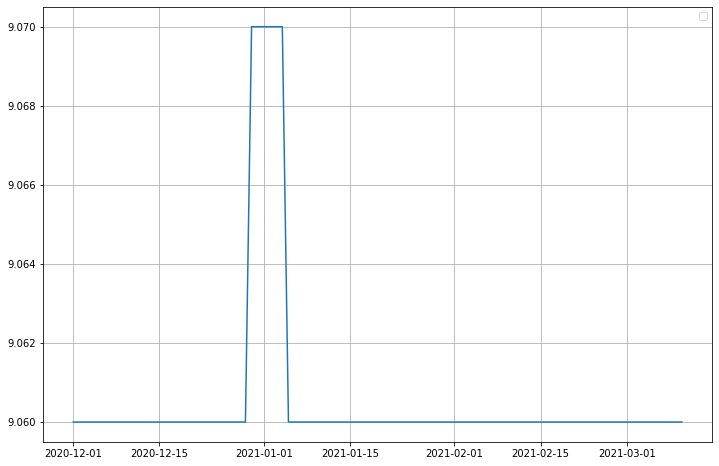

In [33]:
plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [34]:
# 영화멸 날짜 변화에 따른 평점 변화 확인
movie_pivot = pd.pivot_table(
      movie_df
    , index=['date']
    , columns=['name']
    , values=['point']
)
movie_pivot.head(10)

point                                                         \
name        1917 69세 800 가나의 혼인잔치: 언약 가장 따뜻한 색, 블루   경계선 굿바이 귀여운 여인  그녀   
date                                                                      
2020-12-01  8.86 NaN NaN          NaN          NaN   NaN NaN    8.7 NaN   
2020-12-02  8.86 NaN NaN          NaN          NaN   NaN NaN    8.7 NaN   
2020-12-03  8.86 NaN NaN          NaN          NaN   NaN NaN    8.7 NaN   
2020-12-04  8.86 NaN NaN          NaN          NaN   NaN NaN    8.7 NaN   
2020-12-05  8.86 NaN NaN          NaN          NaN   NaN NaN    8.7 NaN   
2020-12-06  8.86 NaN NaN          NaN          NaN   NaN NaN    8.7 NaN   
2020-12-07  8.86 NaN NaN          NaN         8.77  8.17 NaN    8.7 NaN   
2020-12-08  8.86 NaN NaN          NaN         8.77  8.17 NaN    8.7 NaN   
2020-12-09  8.86 NaN NaN          NaN         8.77  8.17 NaN    8.7 NaN   
2020-12-10  8.86 NaN NaN          NaN         8.77  8.17 NaN    8.7 NaN   

                    ...                                                  \
name       그레이트 뷰티  ... 피아노 피아니스트의 전설 하나와 앨리스 해리 포터와 불의 잔 해리가 샐리를 만났을 때   
date                ...                                                   
2020-12-01     NaN  ... NaN       NaN     NaN         NaN          8.89   
2020-12-02     NaN  ... NaN       NaN     NaN         NaN          8.89   
2020-12-03     NaN  ... NaN       NaN     NaN         NaN          8.89   
2020-12-04     NaN  ... NaN       NaN     NaN         NaN          8.89   
2020-12-05     NaN  ... NaN       NaN     NaN         NaN          8.89   
2020-12-06     NaN  ... NaN       NaN     NaN         NaN          8.89   
2020-12-07     NaN  ... NaN       NaN     NaN         NaN          8.89   
2020-12-08     NaN  ... NaN       NaN     NaN         NaN          8.89   
2020-12-09     NaN  ... NaN       NaN     NaN         NaN          8.89   
2020-12-10     NaN  ... NaN       NaN     NaN         NaN          8.89   

                                               
name       해피 투게더 현기증  협상 호랑이보다 무서운 겨울손님 화양연화  
date                                           
2020-12-01    NaN NaN NaN           7.03  NaN  
2020-12-02    NaN NaN NaN           7.03  NaN  
2020-12-03    NaN NaN NaN           7.03  NaN  
2020-12-04    NaN NaN NaN            NaN  NaN  
2020-12-05    NaN NaN NaN            NaN  NaN  
2020-12-06    NaN NaN NaN            NaN  NaN  
2020-12-07    NaN NaN NaN            NaN  NaN  
2020-12-08    NaN NaN NaN            NaN  NaN  
2020-12-09    NaN NaN NaN            NaN  NaN  
2020-12-10    NaN NaN NaN            NaN  NaN  

[10 rows x 187 columns]

In [35]:
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

name,1917,69세,800,가나의 혼인잔치: 언약,"가장 따뜻한 색, 블루",경계선,굿바이,귀여운 여인,그녀,그레이트 뷰티,...,피아노,피아니스트의 전설,하나와 앨리스,해리 포터와 불의 잔,해리가 샐리를 만났을 때,해피 투게더,현기증,협상,호랑이보다 무서운 겨울손님,화양연화
date,,,,,,,,,,,,,,,,,,,,,
2020-12-01,8.86,NaN,NaN,NaN,NaN,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,8.89,NaN,NaN,NaN,7.03,NaN
2020-12-02,8.86,NaN,NaN,NaN,NaN,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,8.89,NaN,NaN,NaN,7.03,NaN
2020-12-03,8.86,NaN,NaN,NaN,NaN,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,8.89,NaN,NaN,NaN,7.03,NaN
2020-12-04,8.86,NaN,NaN,NaN,NaN,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,8.89,NaN,NaN,NaN,NaN,NaN
2020-12-05,8.86,NaN,NaN,NaN,NaN,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,8.89,NaN,NaN,NaN,NaN,NaN


droplevel : level을 지움 (위의 표에서는 point를 지움)

C:\Users\dpqls\anaconda3\envs\dev-ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44537 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dpqls\anaconda3\envs\dev-ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dpqls\anaconda3\envs\dev-ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dpqls\anaconda3\envs\dev-ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dpqls\anaconda3\envs\dev-ml\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dpqls\anaconda3\envs\dev-ml\lib\site-packages\matplotlib

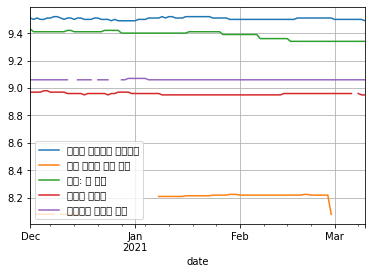

In [36]:
movie_pivot.plot(y=['극장판 바이올렛 에버가든','너의 췌장을 먹고 싶어', '부활: 그 증거', '남매의 여름밤', '타오르는 여인의 초상'])
plt.legend(loc='best') # best : 범례를 좋은 위치에 만들어라
plt.grid()
plt.show()